In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [13]:
train_df=pd.read_excel("../data/train_nor_811.xlsx")
test_df=pd.read_excel("../data/test_nor_811.xlsx")
valid_df=pd.read_excel("../data/valid_nor_811.xlsx")

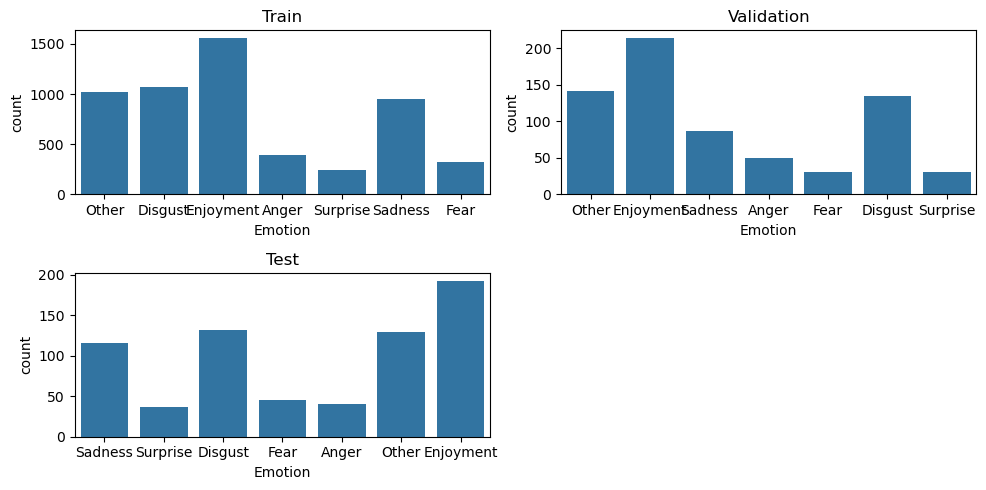

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))
sns.countplot(data=train_df, x="Emotion", ax=ax1)
ax1.set_title("Train")

sns.countplot(data=valid_df, x="Emotion", ax=ax2)
ax2.set_title("Validation")

sns.countplot(data=test_df, x="Emotion", ax=ax3)
ax3.set_title("Test")

ax4.axis("off")
plt.tight_layout()
plt.show()


In [17]:
full_train=pd.concat([train_df,valid_df])
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(full_train["Sentence"])
y_train=full_train["Emotion"]

X_test=vectorizer.transform(test_df["Sentence"])
y_test=test_df["Emotion"]

In [18]:
model=LinearSVC()
model.fit(X_train,y_train)

LinearSVC()

In [19]:
y_pred=model.predict(X_test)
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Anger       0.41      0.30      0.35        40
     Disgust       0.47      0.54      0.50       132
   Enjoyment       0.56      0.63      0.59       193
        Fear       0.76      0.67      0.71        46
       Other       0.43      0.44      0.44       129
     Sadness       0.56      0.50      0.53       116
    Surprise       0.58      0.30      0.39        37

    accuracy                           0.52       693
   macro avg       0.54      0.48      0.50       693
weighted avg       0.52      0.52      0.52       693

